<img src="logo_UNSAM.jpg" align="right" width="120">


# <center>Trabajo final: *Detección de oscilaciones de la frecuencia cardíaca postictales en epilepsia parcial*</center> 

### <center> - Alumna: Lola Pampin</center> 

### <center> - Profesor: Mariano Llamedo Soria</center> 

### <center>Febrero 2026</center> 

## <center> Universidad Nacional de San Martín, Escuela de Ciencia y Tecnología</center> 




# Resumen

En el presente informe se analiza la presencia de oscilaciones de la frecuencia cardíaca durante el período postictal en el contexto de la epilepsia parcial. El estudio se enmarca en el Trabajo Final de la materia Análisis y Procesamiento de Señales y busca replicar, a escala reducida, los resultados reportados por Al‑Aweel et al. (1999). En dicha investigación se describen oscilaciones postictales transitorias y prominentes de baja frecuencia (0,01–0,1 Hz), asociadas a convulsiones, las cuales podrían constituir un indicador de inestabilidad neuroautonómica. 

La base de datos consultada se encuentra disponible en el siguiente enlace: https://physionet.org/content/szdb/1.0.0/

<u>*Palabras clave*</u>: Epilepsia — Variabilidad de la frecuencia cardíaca 



# I. Introducción

## <u>**Marco clínico**</u>

## Epilepsia

La epilepsia es un trastorno neurológico crónico caracterizado por la aparición recurrente de crisis, producto de una actividad neuronal anormal, excesiva o sincrónica en el cerebro. Estas crisis pueden generar consecuencias negativas tanto a corto como a largo plazo, incluyendo caídas, traumatismos, mortalidad prematura, trastornos psiquiátricos, déficits cognitivos y dificultades en el ámbito social, laboral y académico.

<u> Clasificación de epilepsia</u>

La epilepsia se puede clasificar según el tipo de convulsión. Según la Liga Internacional contra la Epilepsia, las convulsiones se clasifican según donde se originan en el cerebro. A partir de este parámetro, las convulsiones pueden ser:

- <u>Generalizadas</u>: se originan simultáneamente en ambos hemisferios (inicio generalizado).

- <u>Parciales</u>: Son aquellas que poseen un inicio focal, es decir, en una sola zona del cerebro. Este tipo de convulsión se divide a su vez en simples (afectan una pequeña porción del cerebro) o complejas (comienzan en un área y se propagan a otra). 

La principal diferencia entre una convulsión parcial simple y una convulsión parcial compleja es la alteración de la consciencia y un período postictal en esta última, que también se presenta en una convulsión generalizada. Es decir, las convulsiones parciales complejas y las generalizadas pueden presentarse de forma similar, pero difieren en que en las parciales la convulsión se propaga de un área focal a otra (no se presenta en ambos hemisferios al mismo tiempo).

### Ritmo cardíaco

La medición del ritmo cardíaco constituye una herramienta fundamental en el monitoreo de la salud, ya que permite detectar alteraciones en la actividad cardiovascular y evaluar el estado físico de una persona. 

Específicamente, la frecuencia cardiaca es el número de veces que se contrae el corazón durante un minuto. Desde el punto de vista teórico, el cálculo del ritmo cardíaco se realiza midiendo el intervalo entre latidos consecutivos, denominado intervalo RR. 

El ritmo cardíaco se puede obtener a través de este intervalo, como se muestra en las ecuaciones 1 y 2. 

$$
Intervalo RR [s] = Intervalo RR[muestras] \times \frac {1}{fs}          (1)
$$

Finalmente, a partir de dicho valor, se calcula el ritmo cardíaco en pulsaciones por minuto (BPM) como:

$$
BPM = \frac{60}{Intervalo RR en segundos}               (2)
$$

### Electrocardiograma

El electrocardiograma (ECG) es un estudio que mide las señales eléctricas del corazón durante cada latido. Su análisis permite identificar patologías, alteraciones del ritmo cardíaco y variaciones en la conducción eléctrica. Los principales componentes de un latido son:

- <u>Onda P</u>: representa la despolarización auricular (las cavidades superiores del corazón se activan eléctricamente). Es de baja amplitud (0.1-0.2 mV) y relativamente lenta.

- <u>Complejo QRS</u>: corresponde a la despolarización ventricular (activación eléctrica de los ventrículos, las cavidades encargadas de bombear sangre al cuerpo). Es el componente de mayor energía y rapidez en el ECG. Su pendiente pronunciada requiere preservar componentes de frecuencia relativamente altas.

- <u>Onda T </u>: asociada a la repolarización ventricular (luego de activarse, las células vuelven a su voltaje "de reposo"). Es más ancha que la onda P y su contenido espectral es de menor frecuencia que el QRS.


## <u>**Herramientas**</u>
## **Análisis espectral**

### *Transformada Discreta de Fourier*

La Transformada Discreta de Fourier (DFT) es una transformación lineal que asocia a cada muestra temporal x[n] un coeficiente complejo X[k], el cual representa la contribución de cada componente frecuencial presente en la señal. En aplicaciones prácticas, donde las señales son digitales y de duración finita, el análisis espectral se realiza mediante implementaciones computacionales de la DFT.

En este trabajo se utiliza la Transformada Rápida de Fourier (FFT), un algoritmo eficiente para el cálculo de la DFT. La FFT reduce significativamente el costo computacional al explotar las propiedades de simetría y periodicidad de la transformada mediante una estrategia de tipo divide y vencerás, lo que la convierte en la herramienta estándar para el análisis espectral en el procesamiento digital de señales.

### *Método de Welch*

Dado que en la práctica las señales son discretas, finitas y aleatorias, y solo se dispone de realizaciones finitas, la densidad espectral de potencia (PSD) debe obtenerse mediante métodos de estimación. En este informe se emplea el método de Welch, que consiste en dividir la señal en segmentos parcialmente solapados, aplicar una ventana a cada uno, calcular sus periodogramas y promediarlos. Este procedimiento reduce la varianza y la fuga espectral, proporcionando una estimación estable del contenido espectral, especialmente adecuada para señales fisiológicas.

Su definición matemática es:

$$ P_W(\omega, L, D, M) =  \frac{     \frac{1}{M} \sum_{m=0}^{M-1}      \left( \sum_{n=0}^{L-1} x[n + mD] w_L[n] e^{-j\omega n} \right)^2 }{     \sum_{n=0}^{L-1} w_L^2[n] } $$

## **Filtros**
Una vez adquirida la señal de ECG, es necesario aplicar un proceso de filtrado. En este caso en particular se utilizó un filtro digital IIR tipo Butterworth de orden 4, con el objetivo de atenuar tanto las componentes de alta frecuencia asociadas al ruido muscular como las componentes de baja frecuencia debidas a la respiración y a la deriva de línea de base. El filtro tipo Butterworth se caracteriza por presentar máxima planitud en la banda pasante, ausencia de ripple y una transición suave entre bandas. Adicionalmente, se implementó de forma opcional un filtro rechazabanda centrado en 50 Hz para eliminar la interferencia de la red eléctrica.

### *Interpolación*

La interpolación por splines consiste en aproximar una señal mediante funciones polinómicas. De esta manera se garantiza la continuidad y suavidad en los puntos de unión. Este método permite reconstruir la línea de base de señales de forma precisa sin introducir oscilaciones abruptas, siendo especialmente útil en el procesamiento de señales biomédicas.

# II. **Materiales y métodos**

La base de datos utilizada incluye 11 registros de ECG continuo, obtenidos mediante una única derivación y muestreados a 200 Hz, correspondientes a episodios registrados en cinco pacientes mujeres,  entre 31 y 48 años. Ninguna de las participantes presentaba evidencia clínica de enfermedad cardíaca. Todas cursaban crisis epilépticas parciales, con o sin generalización secundaria.

Los pasos a seguir para el análisis de lo datos son:
1. *Adquisición del ECG*: Se muestra únicamente el análisis realizado sobre el registro identificado como número 1 en la base de datos analizada. Cabe destacar que dentro del repertorio hay un archivo que describe el tiempo al cual comienza y termina cada episodio. En base a esto se determina el intervalo en el que se analiza cada paciente (aproximadamente 6 minutos antes y después de la convulsión).
2. *Preprocesamiento de la serie temporal*: en primer lugar se detectan los latidos cardíacos, y a partir de ello se construye la serie de intervalos RR. Con esta información se calcula el ritmo cardiaco. Mediante la aplicación de una interpolación de grado 10 se obtiene la línea de tendencia, para luego restarla a la señal y obtener su versión detrendida.
3. *Análisis espectral*: se procede a analizar el espectro de frecuencias. Esto se realiza mediante dos métodos distintos, uno a través de la Transformada Rapida de Fourier con una ventana rectangular (tal como sugiere el paper que se toma como referencia) y otro a través del método de Welch, con el fin de obtener un análisis más preciso.

# III. **Desarrollo y resultados**
A continuación se detallan las funciones utilizadas y se muestran los resultados obtenidos.

In [21]:
# %% LIBRERIAS


import matplotlib.pyplot as plt
from os import listdir
from scipy.signal import welch, windows, sosfiltfilt, iirnotch, butter, filtfilt, find_peaks
from numpy.fft import fft
from scipy.interpolate import interp1d
import math
import numpy as np

# %% Variables globales

fs=200 #Hz --> establecida en paper 
F_QRS=[5,15] # [Hz] rango de frecuencia complejo QRS

fs_hr = 4.0  # Hz frecuencia para muestreo uniforme de HR para aplicacion de la FFT

## Frecuencia cardiaca minima y maxima (umbral fisiologico) ##
MIN_HR=20 #latidos/min
MAX_HR=220

RR_MIN = 0.3 #[s]  (200 bpm)
rr_max = 2#[s]  (30 bpm)

PRE_ICT1 = 14
POS_ICT1= 16

In [22]:
# %%Filtrado ECG
def ecg_filter(ecg, fs, low=8.0, high=20.0, order=4, q_notch=30, notch= False):
    #FILTRO BUTTER PASA BANDA Y NOTCH RECHAZA BANDA + FILTRADO BIDERECCIONAL
    ecg = np.asarray(ecg, dtype=np.float64).ravel() #CONVERSION A ARRAY PLANO
    # Pasabanda Butterworth en Hz
    sos = butter(order, [low, high], btype='bandpass', output='sos', fs=fs) #FILTRO BUTTER TIPO PASABANDA DE ORDEN 4 FILTRADO EN LA FRECUENCIA DEL QRS
    y = sosfiltfilt(sos, ecg)

    #filtro rechazanbanda
    if notch : 
        b, a = iirnotch(w0=50, Q=q_notch, fs=fs) #FILTRO IIR RECHAZABANDA LOS 50HZ DE ALTERNA
        y = filtfilt(b, a, y)
        
    return y 
# %% Lectura  + Graficos ECG

In [23]:
# %% Leer archivo ECG
def leer_archivo(path, start, stop):
    #Lectura de archivos --> devuelve el ECG SIN FILTRAR
    start = round(start * 12000)
    stop = round(stop * 12000)
    raw = np.fromfile('data/' + path, dtype=np.int16)
    gain = 25
    baseline = 26

    ecg_mV = (raw - baseline) / gain
    
    t = np.arange(len(ecg_mV)) / fs
    
    return ecg_mV[start:stop],t[start:stop]

In [24]:
# %% Grafico ECG
def graficar_ecg(ecg_f, ecg_mV, t, r_locs, name, tz, banda_color="#2ca02c", dpi=150):
    """
    Grafica ECG crudo, ECG filtrado y picos R; resalta la banda de tiempo del episodio.

    Parámetros
    ----------
    ecg_f : array
        ECG filtrado (mismas muestras que ecg_mV)
    ecg_mV : array
        ECG crudo (en mV)
    t : array
        Vector tiempo en segundos (puede empezar en t[0] != 0)
    r_locs : array (int)
        Índices de muestra de picos R sobre los vectores ecg_f/ecg_mV
    name : str
        Texto para el título
    tz : tuple(float, float)
        (t_lo, t_hi) en segundos para sombrear el episodio (mismas unidades que t)
    fs : float
        Frecuencia de muestreo [Hz]
    banda_color : str
        Color de la banda de episodio
    dpi : int
        DPI de la figura

    Retorna
    -------
    fig, ax : objetos de Matplotlib
    """
    # Estilo y figura
    plt.style.use("seaborn-v0_8-whitegrid")

    fig, ax = plt.subplots(figsize=(14, 6), dpi=dpi)

    # Curvas
    ax.plot(t, ecg_mV, label='ECG crudo', alpha=0.4)
    ax.plot(t, ecg_f,  label='ECG filtrado', linewidth=1.0)

    # Picos R en el mismo origen temporal que t
    t0 = t[0]
    t_r = t0 + (np.asarray(r_locs, dtype=int) / fs)
    # Filtrar por seguridad posibles índices fuera de rango
    r_mask = (r_locs >= 0) & (r_locs < len(ecg_f))
    t_r = t0 + (np.asarray(r_locs[r_mask]) / fs)

    ax.scatter(t_r, ecg_f[r_locs[r_mask]], color='r', s=20, label='R-peaks', zorder=3)

    # Banda de episodio (en segundos)
    f_lo, f_hi = tz
    ax.axvspan(f_lo, f_hi, color=banda_color, alpha=0.15,
               label=f"Episodio {f_lo:.2f}–{f_hi:.2f} s")
    ax.axvline(f_lo, color=banda_color, linestyle="--", linewidth=1.2, alpha=0.8)
    ax.axvline(f_hi, color=banda_color, linestyle="--", linewidth=1.2, alpha=0.8)

    # Decoración
    ax.set_xlabel('Tiempo [s]')
    ax.set_xlim(875,885)
    ax.set_ylabel('Voltaje [mV]')
    ax.set_title(f"ECG ({name})")
    ax.legend(loc='best')
    ax.grid(True)

    fig.tight_layout()
    return 

In [25]:
# %% Deteccion de latidos

def detect_rpeaks(ecg, fs=fs, band=(8,20), win_ms=120, refractory_ms=200):
    """
    Devuelve índices de picos R en la señal original.
    """
    # 1) Filtrado para resaltar QRS atenuar: bajas frec(deriva de línea base, respiración, onda P) y altas frec (ruido muscular/EMG).
    ecg_f = ecg_filter(ecg, fs, low=band[0], high=band[1], order=4)

    # 2) Realce tipo Pan-Tompkins: derivada + cuadrado + ventana móvil
    d = np.diff(ecg_f, prepend=ecg_f[0]) #derivda discreta
    y = d**2                            #energia de la pendiente
    win = max(1, int(round(win_ms * fs / 1000.0)))#ventana de muestras
    kernel = np.ones(win) / win
    # Convolución con misma longitud
    y_int = np.convolve(y, kernel, mode='same') #promedio movil

    # 3) Umbral adaptativo simple
    thr = 0.5 * np.median(y_int[y_int > 0])  # evita ceros
    if prominence is None:
    prom = 0.5 * thr # Prominence mínima relativa


    # 4) Búsqueda de picos en y_int (no directamente en ecg)
    # refractory = 200 ms (para adulto típico). 
    distance = int(round(refractory_ms * fs / 1000.0))
    peaks, props = find_peaks(y_int, height=thr, prominence=prom, distance=distance)

    # 5) Refino posición del pico: mover al máximo local en ecg_f cerca del pico

    r_locs = []
    radius = max(1, int(round(0.08 * fs)))  # ±80 ms
    n = len(ecg_f)
    for p in peaks:
        i0 = max(0, p - radius)
        i1 = min(n, p + radius + 1)
        if i1 > i0:
            local = np.argmax(ecg_f[i0:i1]) + i0
            r_locs.append(local)
    r_locs = np.array(sorted(set(r_locs)))  # únicos y ordenados

    return r_locs, ecg_f, y_int, thr

# %% Construccion temporal de HR a partir de latidos R (RR) y su interpolacion uniforme para FFT/PSD

In [26]:
# %% Construccion seg RR
def const_RR (ecg, r_locs, fs=fs, fs_hr=fs_hr, hr_bounds=(40, 180), detrend_deg=10):
    """
    A partir de picos R (índices), devuelve:
      - t_hr: tiempos de cada HR instantánea (s)
      - hr: HR instantánea (bpm)
      - t_u, hr_u: HR uniformizada a fs_hr (opcionalmente con detrend si se pide)
      - (trend si detrend_deg no es None)
    """

    r_locs = np.asarray(r_locs).astype(int)
    r_locs = r_locs[(r_locs > 0) & (r_locs < len(ecg))]  # seguridad

    if len(r_locs) < 2:
        raise ValueError("No hay suficientes latidos para calcular RR/HR.")

    # 1) RR en segundos
    rr = np.diff(r_locs) / fs  # s
    
    # 2) Tiempo asociado a cada RR/HR: usar el tiempo del segundo R (o el medio)
    # opción más estable para time-stamp: el punto medio entre R_i y R_i+1
    r_times = r_locs / fs
    t_hr = 0.5 * (r_times[1:] + r_times[:-1])

    # 3) HR instantánea
    hr = 60.0 / rr  # bpm

    # 4) Outliers en HR
    lo, hi = hr_bounds
    mask = (hr > lo) & (hr < hi)
    t_hr = t_hr[mask]
    hr = hr[mask]

    
    results = {
        "t_hr": t_hr,
        "hr": hr,
    }

    # 5) Serie HR uniforme 
    if len(t_hr) >= 2:
        t0, tf = t_hr[0], t_hr[-1]
        n = int(np.floor((tf - t0) * fs_hr)) + 1
        n = max(n, 2)
        t_u = np.linspace(t0, tf, n)

        f = interp1d(t_hr, hr, kind='linear', fill_value='extrapolate', bounds_error=False)
        hr_u = f(t_u)

        if detrend_deg is not None:
            # Ajuste polinomial sobre puntos válidos
            deg = int(detrend_deg)
            use_t, use_hr = t_u, hr_u
            if len(t_u) >= deg + 1:
                p = np.polyfit(use_t, use_hr, deg=deg)
                trend = np.polyval(p, t_u)
                hr_detr = hr_u - trend
                results.update({"t_u": t_u, "hr_u": hr_u, "trend": trend, "hr_detr": hr_detr})
            else:
                results.update({"t_u": t_u, "hr_u": hr_u})
        else:
            results.update({"t_u": t_u, "hr_u": hr_u})
    return results


In [27]:
# %% Grafico HR
def grafico_hr(res, name):
    # HR por latido
    plt.figure(figsize=(14, 6))
    plt.plot(res["t_hr"], res["hr"], label='HR por latido (bpm)')
    plt.xlabel('Tiempo [s]'); plt.ylabel('HR[bpm]'); plt.grid(True); plt.legend(); plt.title(f"FC instantánea ({name})")
    plt.xlim (0,500)
    plt.show()

    if res["t_u"] is not None:
        plt.figure(figsize=(14, 6))
        plt.plot(res['t_u'],res['hr_u'], label='HR uniforme (4 Hz)')
        if "trend" in res:
            plt.plot(res['t_u'], res["trend"], label='Tendencia (polinomio)', linestyle='--')
            plt.plot(res['t_u'], res["hr_detr"], label='HR sin tendencia')
        plt.xlabel('Tiempo [s]'); plt.ylabel('Latidos por minuto [#bpm]'); plt.grid(True); plt.legend(); plt.title('Serie de HR uniformizada')
        plt.show()
    return

In [28]:
# %% FFT y WELCH + graficos PSD
def transformada_rapida(x, name):
    X = fft(x)    
    PDS = np.abs(X)**2
    
    N= len(x)
    df= df = fs_hr / N #resolucion espectral = [[1/(s*muestras)]
    
    
    Ff=np.arange(N)*df #mi eje x en hz
    
    Ff = Ff[:N//2]
    PDS = (np.abs(X)**2) / (N * fs_hr)
    PDS = PDS[:N//2]
    
    return Ff, PDS

# %% PSD POR WELCH
def welch_psd(x, name="PSD WELCH",
              seg_len_sec=60,
              overlap=0.5,
              detrend_already_done=True):

    n = len(x)
    if n < 4:
        raise ValueError("La señal es demasiado corta.")

    nperseg = int(seg_len_sec * fs_hr)
    nperseg = max(64, min(nperseg, n))
    win = windows.hann(nperseg, sym=False)
    noverlap = int(nperseg * overlap)

    def next_pow2(x):
        return 2 ** math.ceil(math.log2(max(1, int(x))))
    nfft = max(nperseg, next_pow2(nperseg))

 
    detrend_arg = False if detrend_already_done else 'constant'

    f, Pxx = welch(x,
                   fs=fs_hr,
                   window=win,
                   nperseg=nperseg,
                   noverlap=noverlap,
                   nfft=nfft,
                   detrend=detrend_arg,   # <- clave
                   return_onesided=True,
                   average='median',
                   scaling='density')
    return f, Pxx


def presentacion_datos(
    f_pre, pxx_pre, 
    f_post, pxx_post, 
    name="PSD HR",
    banda=(0.01, 0.1),          # banda a resaltar [Hz]
    xlim=(0,0.5),
    dpi=150
):

    eps = 1e-20  # estabilidad numérica para log10

    # Estilo base
    plt.style.use("seaborn-v0_8-whitegrid")
    fig, ax = plt.subplots(figsize=(14, 6), dpi=dpi)

    # Curvas PSD en dB
    ax.plot(f_pre, 10*np.log10(pxx_pre + eps), 
            label="PRE ICTAL", 
            color="#1f77b4", linewidth=2.2)
    ax.plot(f_post, 10*np.log10(pxx_post + eps), 
            label="POST ICTAL", 
            color="#d62728", linewidth=2.2)

    # Sombreado de banda
    f_lo, f_hi = banda
    banda_color = "#2ca02c"
    ax.axvspan(f_lo, f_hi, color=banda_color, alpha=0.15, label=f"Banda {f_lo}–{f_hi} Hz")

    # Línea/guías opcionales en los bordes de la banda (estético)
    ax.axvline(f_lo, color=banda_color, linestyle="--", linewidth=1.2, alpha=0.8)
    ax.axvline(f_hi, color=banda_color, linestyle="--", linewidth=1.2, alpha=0.8)

    # Etiquetas y título
    ax.set_xlabel("Frecuencia [Hz]", fontsize=12)
    ax.set_ylabel("PSD [dB]", fontsize=12)
    ax.set_title(f"PSD ritmo cardíaco – {name}", fontsize=14)

    # Límites opcionales
    if xlim is not None:
        ax.set_xlim(*xlim)


    # Leyenda y cuadricula
    ax.legend(loc="best", frameon=True)
    ax.grid(True, which="both", linestyle=":", linewidth=0.8, alpha=0.8)

    # Ajuste de márgenes
    plt.tight_layout()


    plt.show()

    return 

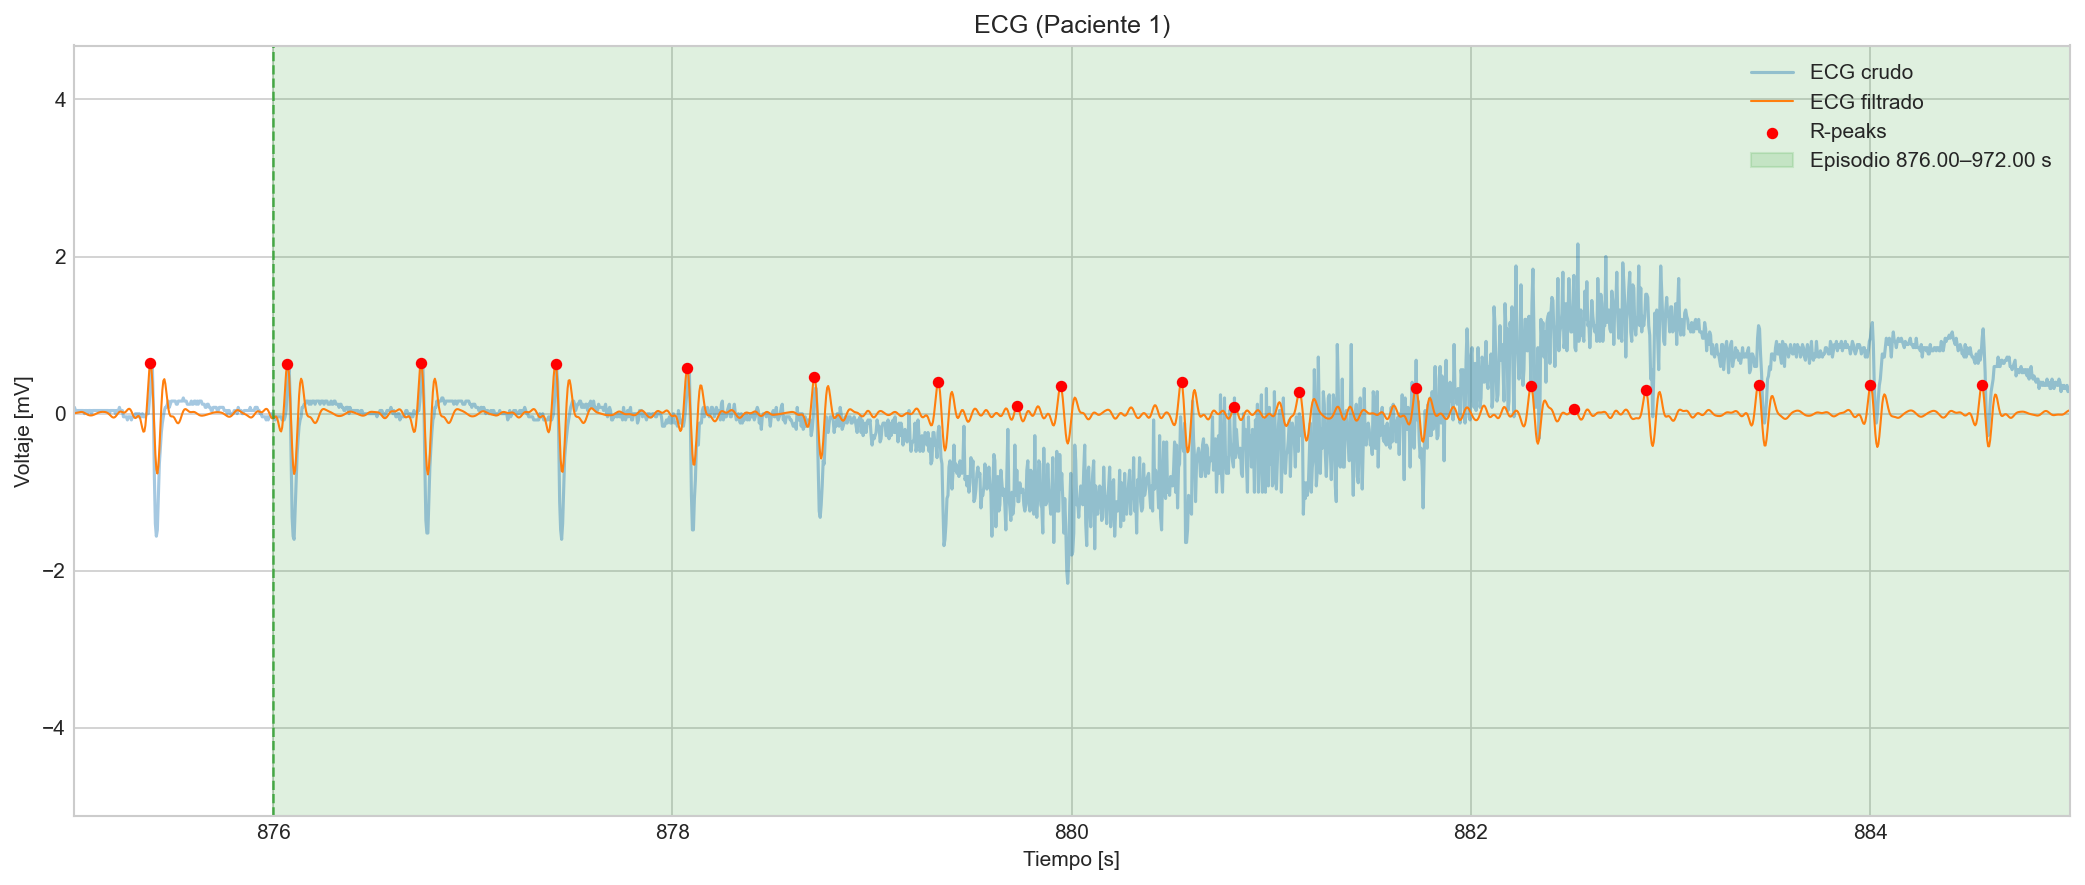

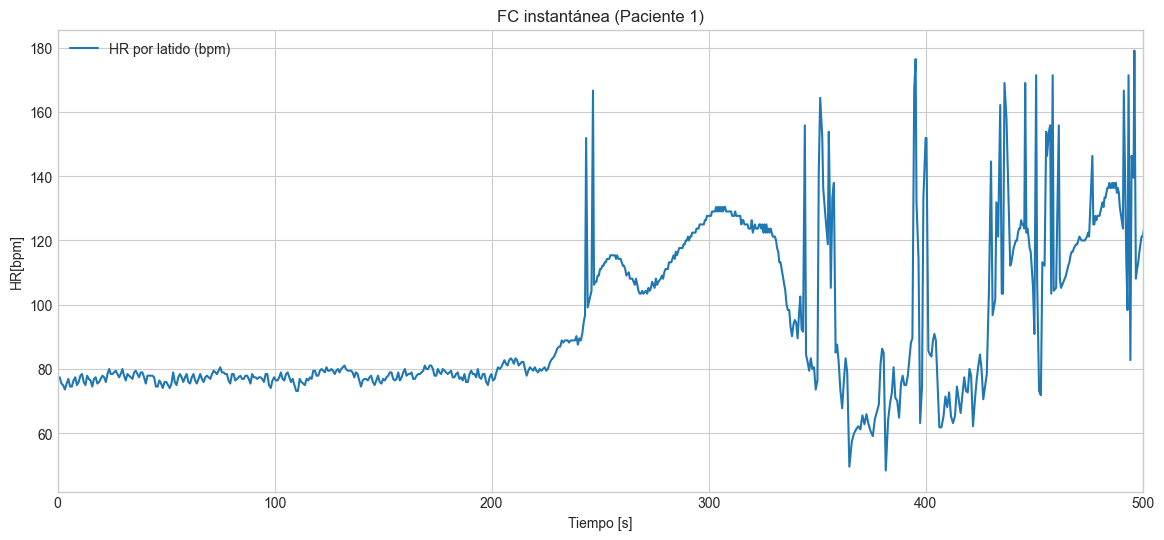

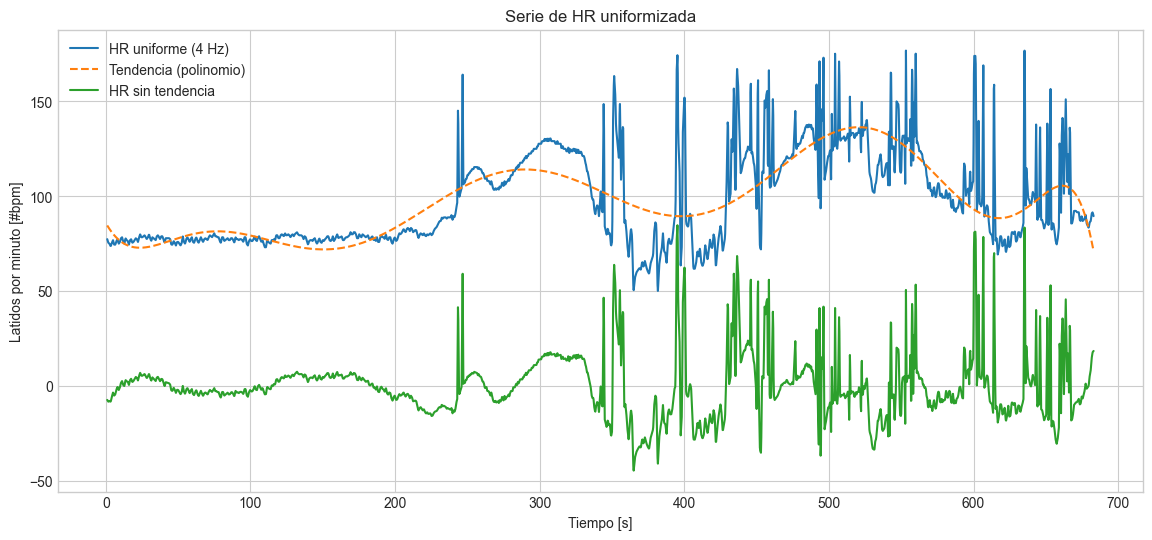

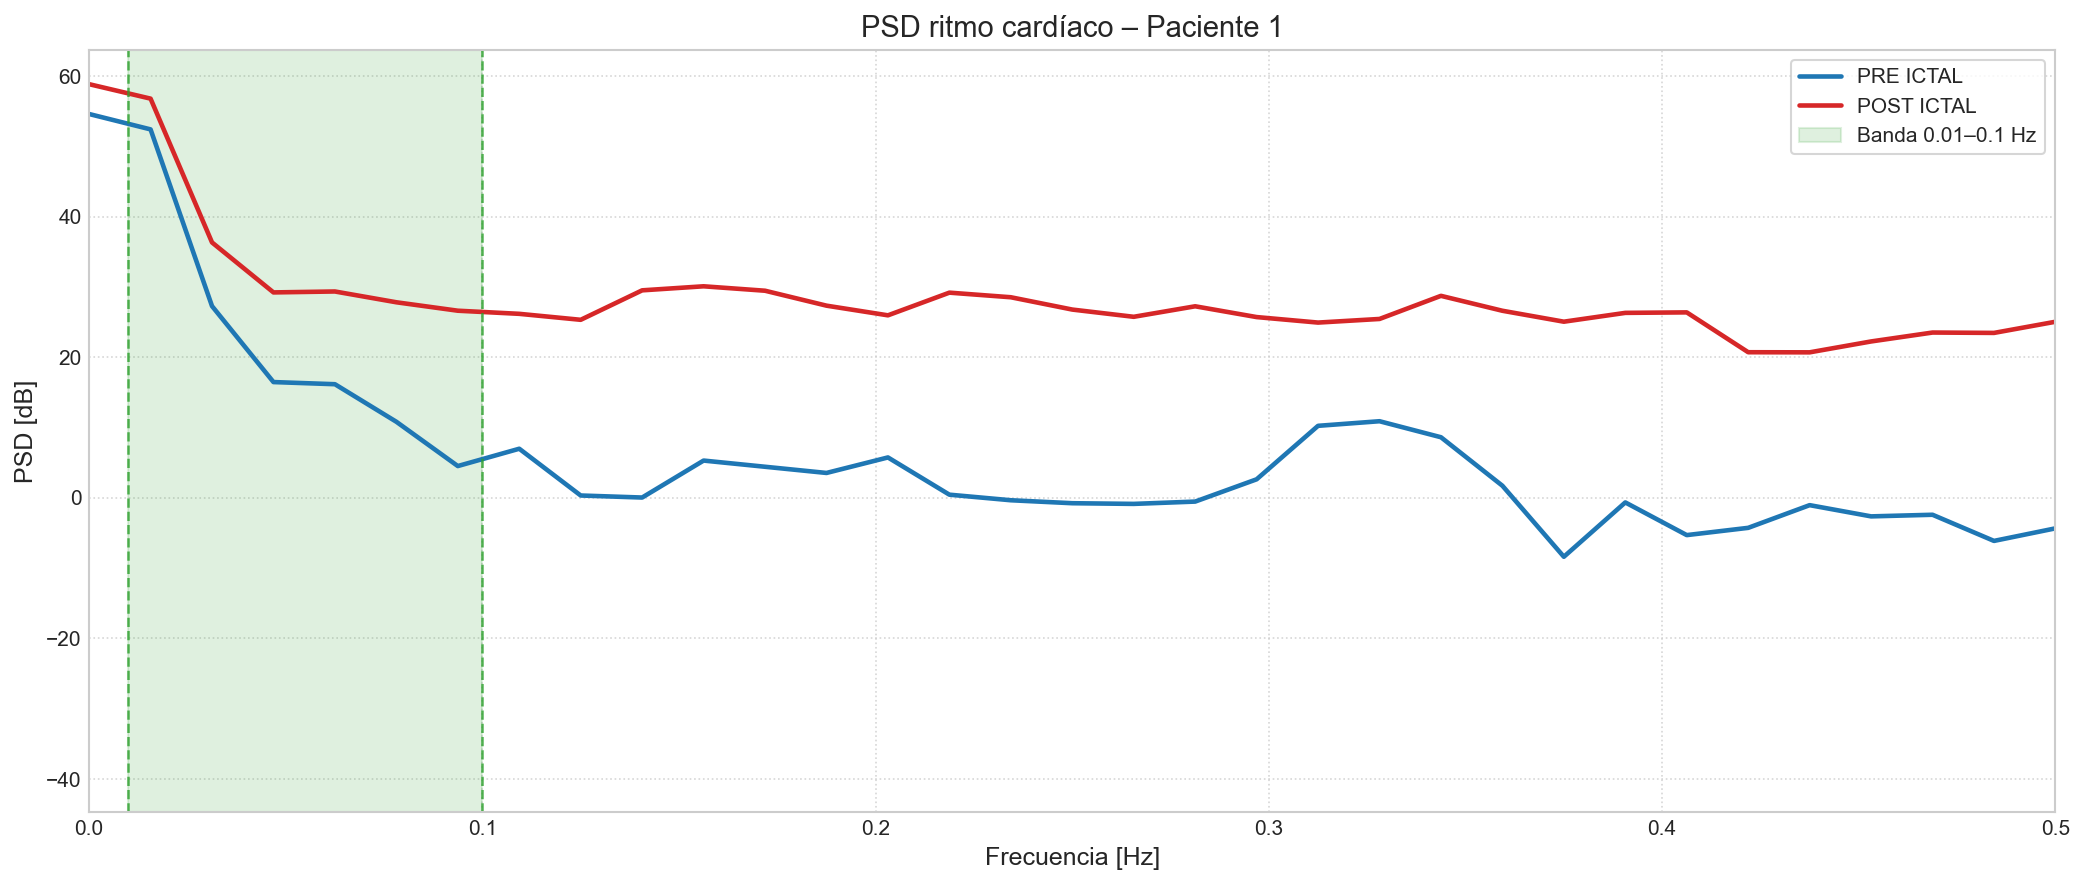

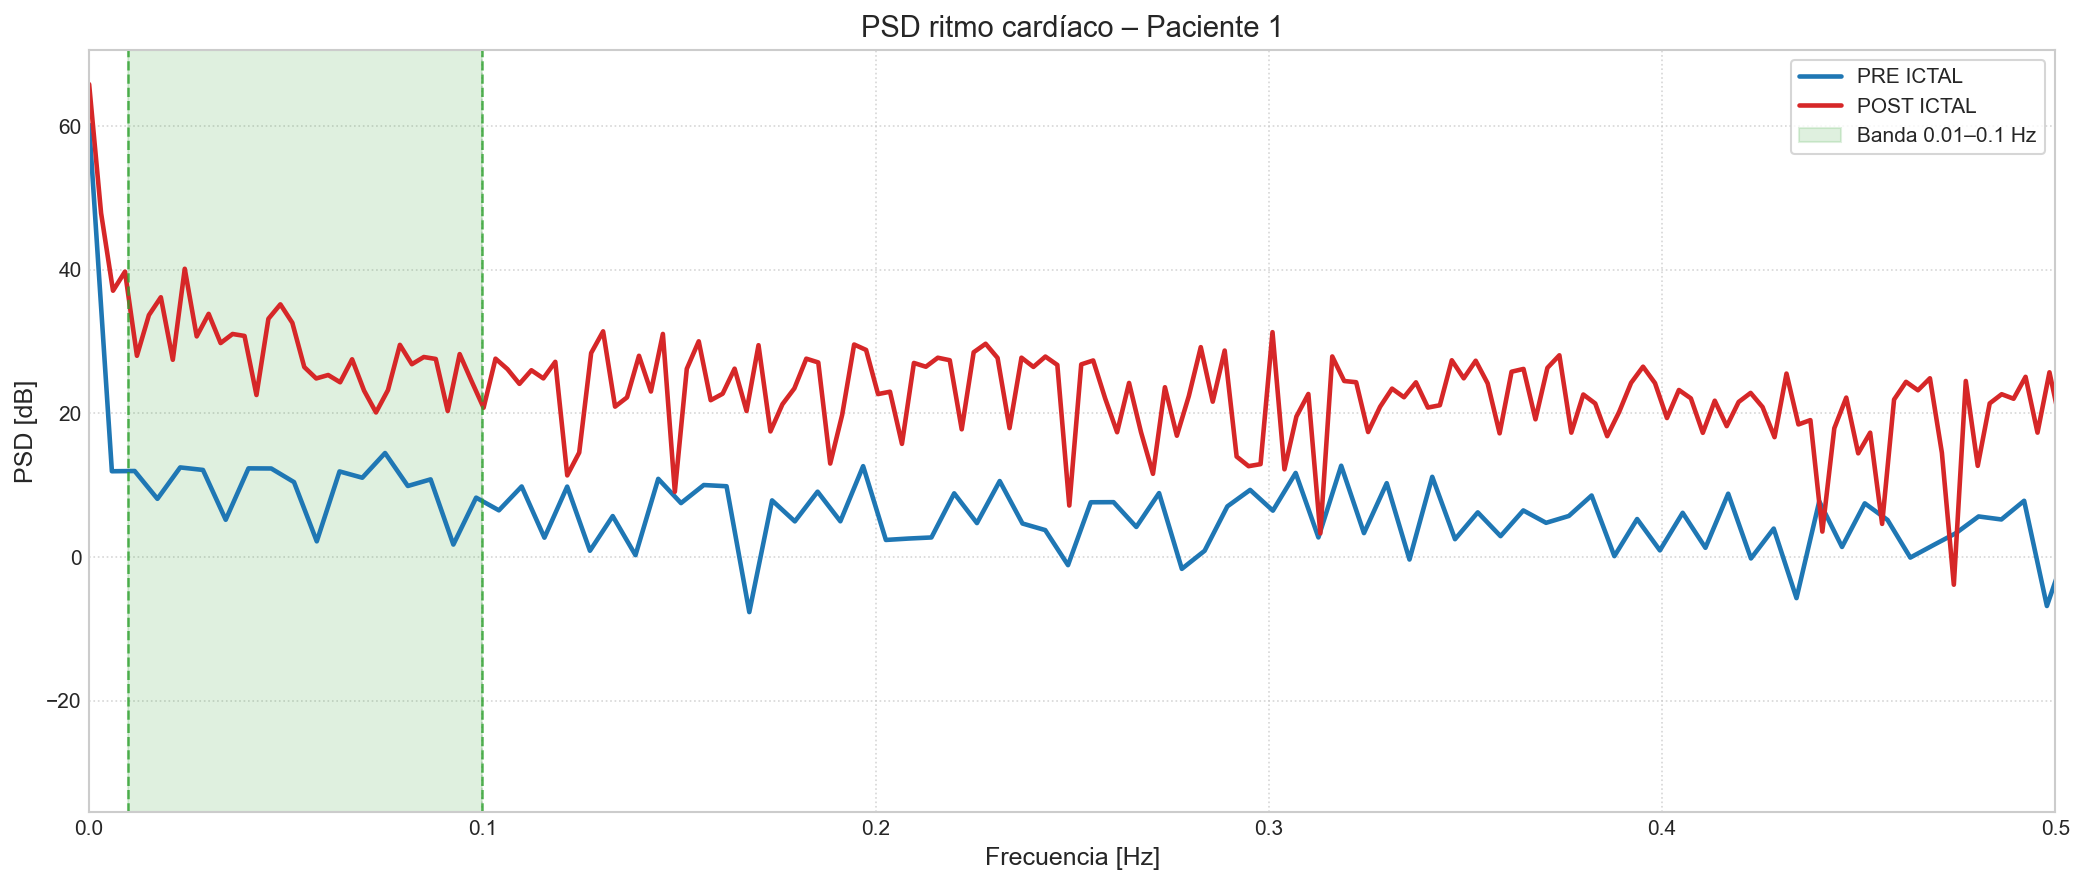

In [29]:
# %% Instanciar funciones
def analizar_paciente(indice, nombre, tiempos, archivos):
    
    paciente = archivos[indice]
    ecg, t = leer_archivo(paciente, tiempos[0] , tiempos[-1])
    r_locs, ecg_f, y_int, thr = detect_rpeaks(ecg, fs, band=(8,20), win_ms=120, refractory_ms=220)
    res = const_RR(ecg, r_locs)
    tz= (14*60+36, 16*60+12)
    graficar_ecg(ecg_f,ecg, t, r_locs, nombre, tz) #grafica el ECG
    grafico_hr(res, nombre) #grafica la HR por latido
    #Ff,PSD= transformada_rapida(hr_d, f"HR ENTERO {nombre}")

    ecg_pre,t_pre= leer_archivo(paciente, tiempos[0], tiempos[1])
    r_locs_pre, ecg_f_pre, y_int_pre, thr_pre = detect_rpeaks(ecg_pre, fs, band=(8,20), win_ms=120, refractory_ms=220)
    res_pre = const_RR(ecg_pre, r_locs_pre, fs, fs_hr, hr_bounds=(MIN_HR, MAX_HR), detrend_deg=4)
    Ff_pre,PSD_pre= transformada_rapida(res_pre['hr_u'], f"PRE ICTAL {nombre}")
    f_hr_pre,pxx_pre= welch_psd(res_pre['hr_u'], f"PRE ICTAL {nombre}")
    


    ecg_post, t_post= leer_archivo(paciente, tiempos[2], tiempos[3])
    r_locs_post, ecg_f_post, y_int_post, thr_post = detect_rpeaks(ecg_post, fs, band=(8,20), win_ms=120, refractory_ms=220)
    res_post = const_RR(ecg_post, r_locs_post, fs, fs_hr, hr_bounds=(MIN_HR, MAX_HR), detrend_deg=4)
    Ff_post,PSD_post= transformada_rapida(res_post['hr_u'], f"POST ICTAL {nombre}")
    f_hr_post,pxx_post= welch_psd(res_post['hr_u'], f"POST ICTAL {nombre}")
    
    
    presentacion_datos(f_hr_pre,pxx_pre,f_hr_post,pxx_post, nombre)
    presentacion_datos(Ff_pre,PSD_pre,Ff_post,PSD_post, nombre)


files = [file for file in listdir('data')]
# Paciente 1  (sz01: 00:14:36 → 00:16:12)
analizar_paciente(0, 'Paciente 1', [10.6, 13.500, 16.5, 22], files)

# IV. **Conclusiones**
En resumen, en el presente informe se buscó analizar la PSD del ritmo cardíaco en ventanas preictales y postictales, poniendo el foco en el rango de baja frecuencia (0,01–0,1 Hz). A diferencia de lo reportado por Al‑Aweel et al. (Neurology, 1999), en el paciente estudiado no se observa una separación clara entre las curvas pre y post en dicho rango (área sombreada en la figura 5). 

Es interesante remarcar que ya en el trabajo de investigación citado se deduce que el fenómeno no es universal y puede depender de características del paciente, del tipo de crisis y/o del protocolo de adquisición y segmentación, ya que se pudo observar únicamente en 5 episodios de los 11 analizados. 

Cabe destacar que se implementaron distintas estrategias con el objetivo de mejorar o complementar las herramientas propuestas en la investigación citada. En particular, se analizó el espectro de la señal mediante el método de Welch (Figura 4). Sin embargo, esta alternativa no mostró mejoras significativas, ya que al suavizar el espectro se atenuan las variaciones espectrales y se dificulta aún más la identificación de las oscilaciones de baja frecuencia reportadas en la bibliografía. No obstante, resulta interesante señalar que, tanto utilizando la FFT como el método de Welch, el espectro correspondiente al período postictal presenta una mayor potencia que el preictal.

Adicionalmente, el polinomio empleado para la interpolación y la estimación de la línea de base es de grado 10, a diferencia del grado 4 utilizado en el trabajo de referencia. Esta modificación se realizó debido a que el polinomio original no lograba un ajuste adecuado de la señal, mientras que un grado superior permitió una representación más fiel de la tendencia basal. Debido a que solo se analiza un periodo corto de la señal, el costo computacional de un polinomio de grado más elevado no interfería con el trabajo.

Por último, cabe mencionar que en el paper citado no se especifica el preprocesamiento aplicado a la señal de ECG. En el presente trabajo, se implementó un filtrado pasabanda Butterworth de orden 4, con el objetivo de aislar el contenido espectral de interés y reducir la influencia de componentes no deseadas, priorizando así el análisis del espectro útil de la señal.

Para trabajos futuros se propone:
1. Ampliar la base de pacientes analizados.
2. Estandarizar las ventanas pre/postictales y controlar por tipo de crisis y medicación.
3. Obtener información sobre el tratamiento previo que se realiza sobre la señal de ECG.
4. Incorporar un algoritmo de detección de latidos y construcción del HR óptimo. 

# Bibliografia consultada
1. Al-Aweel, I. C., Krishnamurthy, K. B., Hausdorff, J. M., Mietus, J. E., Ives, J. R., Blum, A. S., Schomer, D. L., & Goldberger, A. L. (1999). Postictal heart rate oscillations in partial epilepsy. Neurology, 53(7), 1590–1592. https://doi.org/10.1212/wnl.53.7.1590
2. Partial Epilepsy - StatPearls - NCBI Bookshelf.
3. Post-Ictal Heart Rate Oscillations in Partial Epilepsy - James J. Bailey, MD, Alan S. Berson, PhD, Arthur Garson Jr., MD, Leo G. Horan, MD,Peter W. Macfarlane, PhD, David W. Mortara, PhD, Christoph Zywietz, MSc. (s/f).Recommendations for Standardization andSpecifications in Automated Electrocardiography:Bandwidth and Digital Signal Processing.
https://www.ahajournals.org/doi/epdf/10.1161/01.CIR.81.2.730
4. Heart Rate Variability Analysis with the HRV Toolkit
